# 4.1 Downloading the Data

Required data is downloaded in two excel sheets for both Italy (our assigned country) and the US

# 4.2 Cleaning the Data

- Import the dataset of variables and merge the datasets

In [1]:
import numpy as np

In [2]:
import pandas as pd
import datetime

# For Italy data:
# Import the data from Excel and set the first column, which is the date, as the index
italy_data_df = pd.read_excel('International_Financial_Statistics_Italy.xlsx', sheet_name= 'International Financial Statis', index_col=0)

# Drop the first row (which is column names from the Excel sheet)
italy_data_df = italy_data_df.iloc[1:]

# Set the column names
italy_data_df.columns = ['Italy Industrial Production Index', 'Italy Exchange Rates relative to the US Dollar', 'Italy International Reserves and Liquidity', 'Italy Consumer Prices Index']

# Convert the index column to a datetime format
italy_data_df.index = pd.to_datetime(italy_data_df.index)

# Set the index name to "Date"
italy_data_df.index.name = "Date"
# Visualise the first 50 rows
italy_data_df.head(50)



# For US data:
# Import the data from Excel and set the first column, which is the date, as the index
us_data_df = pd.read_excel('International_Financial_Statistics_US.xlsx', sheet_name= 'International Financial Statis', index_col=0)

# Drop the first row (which is column names from the Excel sheet)
us_data_df = us_data_df.iloc[1:]

# Set the column names
us_data_df.columns = ['US International Reserves and Liquidity', 'US Consumer Prices Index']

# Convert the index column to a datetime format
us_data_df.index = pd.to_datetime(us_data_df.index)

# Set the index name to "Date"
us_data_df.index.name = "Date"
# Visualise the first 50 rows
us_data_df.head(50)


# Merge the dataset
df = pd.merge(italy_data_df, us_data_df, left_index=True, right_index=True)
df.head(50)

,Italy Industrial Production Index,Italy Exchange Rates relative to the US Dollar,Italy International Reserves and Liquidity,Italy Consumer Prices Index,US International Reserves and Liquidity,US Consumer Prices Index
Date,,,,,,
1960-01-01,31.134278,621.118012,2989.5,4.143942,21478.1,13.436946
1960-02-01,32.60265,621.118012,2958.5,4.136754,21395.7,13.482806
1960-03-01,33.712883,620.6,2923.5,4.129566,21344.7,13.482806
1960-04-01,33.891953,625.000001,2959.5,4.125971,21278,13.528666
1960-05-01,34.632109,625.000001,2970.5,4.13316,21234.3,13.528666
1960-06-01,35.372264,625.000001,2997.5,4.13316,21169.8,13.574526
1960-07-01,33.891953,625.000001,3088.5,4.151131,20999.4,13.574526
1960-08-01,27.445439,625.000001,3201.5,4.158318,20803.4,13.574526
1960-09-01,35.002186,625.000001,3193.5,4.154724,20430,13.574526


- Construct variables for Italy based on instruction:\
(i) The log exchange rate\
(ii) The difference in the log exchange rate versus the previous month\
(iii) The monthly inflation rate\
(iv) Log industrial production\
(v) Monthly growth in industrial production\
(vi) Growth in industrial production versus 12 months ago (i.e. January 1971 versus January 1970 etc.)\
(vii) An index of the value of international reserves (value of reserves at January 1960 = 100)

In [3]:
import numpy as np

# Insert new column 
#(i) The log exchange rate
df['Log Exchange Rate Italy'] = df['Italy Exchange Rates relative to the US Dollar'].apply(lambda x: np.log(x))
#(ii) The difference in the log exchange rate versus the previous month
df['The difference in the Log Exchange Rate Italy'] = df['Log Exchange Rate Italy'].diff()
#(iii) The monthly inflation rate
df['Monthly Inflation Rate Italy'] = df['Italy Consumer Prices Index'].pct_change()*100
#(iv) Log industrial production
df['Log Industrial Production Italy'] = df['Italy Industrial Production Index'].apply(lambda x: np.log(x))
#(v) Monthly growth in industrial production
df['Monthly Growth in Industrial Production Italy'] = df['Italy Industrial Production Index'].pct_change()*100
#(vi) Growth in industrial production versus 12 months ago
df['Growth in industrial production versus 12 months ago Italy'] = df['Italy Industrial Production Index'].pct_change(periods=12)*100
#(vii) An index of the value of international reserves 
df['International Reserves and Liquidity Index Italy'] = df['Italy International Reserves and Liquidity']-df['Italy International Reserves and Liquidity'][0] + 100

df.head(50)

,Italy Industrial Production Index,Italy Exchange Rates relative to the US Dollar,Italy International Reserves and Liquidity,Italy Consumer Prices Index,US International Reserves and Liquidity,US Consumer Prices Index,Log Exchange Rate Italy,The difference in the Log Exchange Rate Italy,Monthly Inflation Rate Italy,Log Industrial Production Italy,Monthly Growth in Industrial Production Italy,Growth in industrial production versus 12 months ago Italy,International Reserves and Liquidity Index Italy
Date,,,,,,,,,,,,,
1960-01-01,31.134278,621.118012,2989.5,4.143942,21478.1,13.436946,6.431521,NaN,NaN,3.438309,NaN,NaN,100.0
1960-02-01,32.60265,621.118012,2958.5,4.136754,21395.7,13.482806,6.431521,0.000000,-0.173471,3.484394,4.716258,NaN,69.0
1960-03-01,33.712883,620.6,2923.5,4.129566,21344.7,13.482806,6.430687,-0.000834,-0.173746,3.517880,3.405346,NaN,34.0
1960-04-01,33.891953,625.000001,2959.5,4.125971,21278,13.528666,6.437752,0.007065,-0.087050,3.523178,0.531161,NaN,70.0
1960-05-01,34.632109,625.000001,2970.5,4.13316,21234.3,13.528666,6.437752,0.000000,0.174226,3.544781,2.183868,NaN,81.0
1960-06-01,35.372264,625.000001,2997.5,4.13316,21169.8,13.574526,6.437752,0.000000,0.000000,3.565928,2.137194,NaN,108.0
1960-07-01,33.891953,625.000001,3088.5,4.151131,20999.4,13.574526,6.437752,0.000000,0.434795,3.523178,-4.184948,NaN,199.0
1960-08-01,27.445439,625.000001,3201.5,4.158318,20803.4,13.574526,6.437752,0.000000,0.173144,3.312200,-19.020782,NaN,312.0
1960-09-01,35.002186,625.000001,3193.5,4.154724,20430,13.574526,6.437752,0.000000,-0.086422,3.555411,27.533710,NaN,304.0


- Construct variables for the US based on instruction:\
(i) The monthly inflation rate\
(ii) An index of the value of international reserves (value of reserves at January 1960 = 100)

In [4]:
#(i) The monthly inflation rate
df['Monthly Inflation Rate US'] = df['US Consumer Prices Index'].pct_change()
#(ii) An index of the value of international reserves (value of reserves at January 1960 = 100)
df['International Reserves and Liquidity Index US'] = df['US International Reserves and Liquidity']-df['US International Reserves and Liquidity'][0] + 100


- Identify outliers\
Is there a small number of implausibly extreme observations within any of the data series? Identify the outliers in each data series and set them to missing.

Here, we use the interquartile range(IQR) to identify outliers, i.e. Using the IQR, the outlier data points are the ones falling below Q1–1.5 IQR or above Q3 + 1.5 IQR

In [5]:
import pandas as pd
import numpy as np

for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), np.nan, df[col])
    
df.head(50)

,Italy Industrial Production Index,Italy Exchange Rates relative to the US Dollar,Italy International Reserves and Liquidity,Italy Consumer Prices Index,US International Reserves and Liquidity,US Consumer Prices Index,Log Exchange Rate Italy,The difference in the Log Exchange Rate Italy,Monthly Inflation Rate Italy,Log Industrial Production Italy,Monthly Growth in Industrial Production Italy,Growth in industrial production versus 12 months ago Italy,International Reserves and Liquidity Index Italy,Monthly Inflation Rate US,International Reserves and Liquidity Index US
Date,,,,,,,,,,,,,,,
1960-01-01,31.134278,621.118012,2989.5,4.143942,21478.1,13.436946,6.431521,NaN,NaN,3.438309,NaN,NaN,100.0,NaN,100.0
1960-02-01,32.60265,621.118012,2958.5,4.136754,21395.7,13.482806,6.431521,0.000000,-0.173471,3.484394,4.716258,NaN,69.0,0.003413,17.6
1960-03-01,33.712883,620.6,2923.5,4.129566,21344.7,13.482806,6.430687,-0.000834,-0.173746,3.517880,3.405346,NaN,34.0,0.000000,-33.4
1960-04-01,33.891953,625.000001,2959.5,4.125971,21278,13.528666,6.437752,0.007065,-0.087050,3.523178,0.531161,NaN,70.0,0.003401,-100.1
1960-05-01,34.632109,625.000001,2970.5,4.13316,21234.3,13.528666,6.437752,0.000000,0.174226,3.544781,2.183868,NaN,81.0,0.000000,-143.8
1960-06-01,35.372264,625.000001,2997.5,4.13316,21169.8,13.574526,6.437752,0.000000,0.000000,3.565928,2.137194,NaN,108.0,0.003390,-208.3
1960-07-01,33.891953,625.000001,3088.5,4.151131,20999.4,13.574526,6.437752,0.000000,0.434795,3.523178,-4.184948,NaN,199.0,0.000000,-378.7
1960-08-01,27.445439,625.000001,3201.5,4.158318,20803.4,13.574526,6.437752,0.000000,0.173144,3.312200,NaN,NaN,312.0,0.000000,-574.7
1960-09-01,35.002186,625.000001,3193.5,4.154724,20430,13.574526,6.437752,0.000000,-0.086422,3.555411,NaN,NaN,304.0,0.000000,-948.1


- Interpolate missing data\
For each series, replace any gaps in the data (including the data you set to missing because they were outliers) with the mean of the value of the series before and after the gap.

In [6]:
for col in df.columns:
    df[col] = df[col].interpolate(method='linear')

- Construct a series for monthly real exchange exchange rate growth\
The real exchange rate is measured for your country relative to the United States. Be clear what the nominal exchange rate data you already have is in terms of and, in your code comments, clearly explain how you calculating the real exchange rate growth.

- The nominal exchange rate data we have downloaded is in **National Currency Per U.S. Dollar**. Therefore, to construct a series for monthly real exchange rate growth,we use **Real exchange rate = Nominal exchange rate x ((1 + Italy inflation rate)/(1+ US inflation rate))** Our group approaches the question to caluculate monthly real exchange rate growth as illustrated in the following step:

    - We downloaded and imported the Nominal Exchange Rates of Italy national currency relative to the US Dollar **in terms of U.S. dollars** as well as the Consumer Price Index (CPI) data for both Italy and the US
    - We also calculate the monthly inflation rates for both Italy and the US in our previous steps
    - Finally, to calculate the **growth rate** of the **real** exchange rate, we use\ Real Exchange Rate = Nominal Exchange Rate x (Italy Inflation Rate / US Inflation Rate)

In [7]:
df['Real Exchange Rate'] = df['Italy Exchange Rates relative to the US Dollar'] * ((1 + df['Monthly Inflation Rate Italy']) / (1 + df['Monthly Inflation Rate US']))
df['Difference in Log of Real Exchange Rate'] = (df['Real Exchange Rate'].apply(lambda x: np.log(x))).diff()

In [8]:
df.reset_index(inplace = True)

# 5.1 Comprehension and Warm Up

Identify when Italy left the Bretton Woods System
- We decided to identify the exit from where the growth in Italy's exchange rate vs USD starts to fluctuate by identifying where the absolute value of the difference in log exchange rates is greater than 0.001

In [9]:
fluctuation = df[(df['The difference in the Log Exchange Rate Italy'] > 0.001) | (df['The difference in the Log Exchange Rate Italy'] < -0.001)]
fluctuation

,Date,Italy Industrial Production Index,Italy Exchange Rates relative to the US Dollar,Italy International Reserves and Liquidity,Italy Consumer Prices Index,US International Reserves and Liquidity,US Consumer Prices Index,Log Exchange Rate Italy,The difference in the Log Exchange Rate Italy,Monthly Inflation Rate Italy,Log Industrial Production Italy,Monthly Growth in Industrial Production Italy,Growth in industrial production versus 12 months ago Italy,International Reserves and Liquidity Index Italy,Monthly Inflation Rate US,International Reserves and Liquidity Index US,Real Exchange Rate,Difference in Log of Real Exchange Rate
3,1960-04-01,33.891953,625.000001,2959.5,4.125971,21278,13.528666,6.437752,0.007065,-0.087050,3.523178,0.531161,NaN,70.0,0.003401,-100.1,568.659398,0.103448
141,1971-10-01,69.109023,612.37,6624.43,6.486226,12145.9,18.756693,6.417337,-0.001844,0.473024,4.235685,-3.629099,2.623648,3734.93,0.002451,-9232.2,899.830187,-0.127797
143,1971-12-01,68.452434,605.701467,6572.840075,6.541194,12314.565226,18.848412,6.406387,-0.011553,0.374882,4.226139,-3.419235,3.166607,3683.340075,0.004890,-9063.534774,828.715943,-0.083879
144,1972-01-01,67.246697,590.67,6749.926118,6.565624,13084.030294,18.848412,6.381257,-0.009021,0.373482,4.208368,-1.761423,4.780506,3860.426118,0.000000,-8294.069706,811.274833,-0.021271
145,1972-02-01,68.643442,586.85,6749.451279,6.60227,12534.818851,18.940132,6.374769,-0.006488,0.558147,4.228926,2.077046,2.788702,3859.951279,0.004866,-8843.281149,909.970603,0.114805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,1990-08-01,51.94566,1158.68,94282.568583,56.149763,NaN,60.351608,7.055037,0.011672,0.683910,3.950198,5.356626,1.975400,91393.068583,0.009202,NaN,1933.321644,0.213243
368,1990-09-01,105.180751,1171.7,92443.529313,56.446401,NaN,60.856066,7.066211,0.011174,0.528298,4.655680,7.625774,-7.558584,89554.029313,0.008359,NaN,1775.86259,-0.084953
369,1990-10-01,115.588303,1141.68,92157.185028,56.912541,NaN,61.222946,7.040256,0.009990,0.825811,4.750035,9.894921,2.221204,89267.685028,0.006029,NaN,2072.000754,0.154228
370,1990-11-01,106.193875,1116.31,87764.009459,57.251568,NaN,61.360525,7.017784,0.008805,0.595698,4.665266,-8.127490,-7.895455,84874.509459,0.002247,NaN,1777.300043,-0.153419


In [10]:
df.iloc[140] #one month before the date where we noticed exchange rates beginning to fluctuate

Date                                                          1971-09-01 00:00:00
Italy Industrial Production Index                                       71.711505
Italy Exchange Rates relative to the US Dollar                              613.5
Italy International Reserves and Liquidity                                6671.22
Italy Consumer Prices Index                                              6.455689
US International Reserves and Liquidity                                  12130.21
US Consumer Prices Index                                                18.710833
Log Exchange Rate Italy                                                   6.41918
The difference in the Log Exchange Rate Italy                           -0.000922
Monthly Inflation Rate Italy                                             0.666662
Log Industrial Production Italy                                          4.272651
Monthly Growth in Industrial Production Italy                           -4.314528
Growth in indust

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 5.3 Analysis

## 5.3.1 Exchange Rate and International Reserve Graphs

Plot a time series graph of the monthly growth in nominal exchange rates of your country,
versus the US dollar, for every month from the start to the end of the sample. Clearly indicate
the time at which that country left the Bretton Woods system.

Plot a time series graph of the monthly growth in real exchange rates of your country, versus
the US dollar, for every month from the start to the end of the sample. Clearly indicate the time
at which that country left the Bretton Woods system.

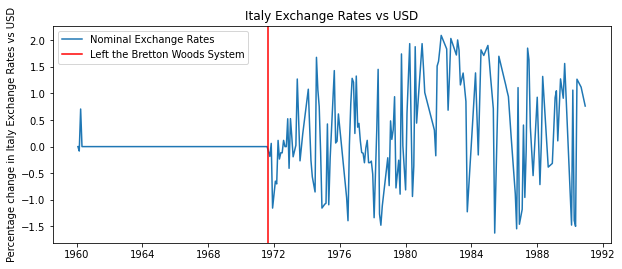

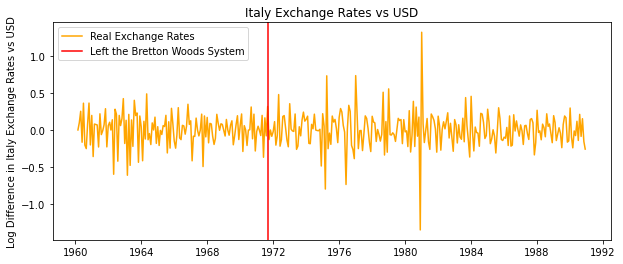

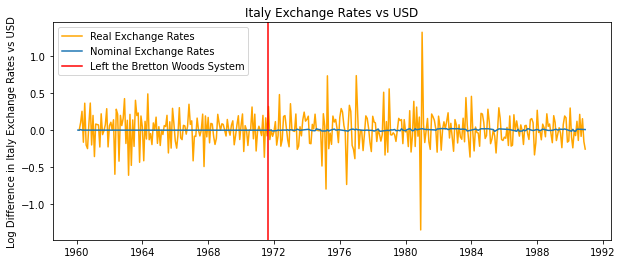

In [12]:
x = df['Date']
y = (df['The difference in the Log Exchange Rate Italy'])*100
graph = plt.figure()
graph.set_figwidth(10)
graph.set_figheight(4)
plt.plot(x, y, label = 'Nominal Exchange Rates')
plt.ylabel('Percentage change in Italy Exchange Rates vs USD')
plt.title('Italy Exchange Rates vs USD')
plt.axvline(x = datetime.date(1971,9,1), color = 'r', label = 'Left the Bretton Woods System')
plt.legend()
plt.show()

graph = plt.figure()
graph.set_figwidth(10)
graph.set_figheight(4)
plt.plot(df['Date'],df['Difference in Log of Real Exchange Rate'], label = 'Real Exchange Rates', color = 'orange')
plt.ylabel('Log Difference in Italy Exchange Rates vs USD')
plt.title('Italy Exchange Rates vs USD')
plt.axvline(x = datetime.date(1971,9,1), color = 'r', label = 'Left the Bretton Woods System')
plt.legend()
plt.show()

graph = plt.figure()
graph.set_figwidth(10)
graph.set_figheight(4)
plt.plot(df['Date'],df['Difference in Log of Real Exchange Rate'], label = 'Real Exchange Rates', color = 'orange')
plt.plot(df['Date'],df['The difference in the Log Exchange Rate Italy'], label = 'Nominal Exchange Rates')
plt.ylabel('Log Difference in Italy Exchange Rates vs USD')
plt.title('Italy Exchange Rates vs USD')
plt.axvline(x = datetime.date(1971,9,1), color = 'r', label = 'Left the Bretton Woods System')
plt.legend()
plt.show()

Why is it useful to plot both real and nominal exchange rate growth?
• Was the US dollar over or undervalued in the Bretton Woods system? Refer to data or figures in
your answer.

Plot a time series graph of the monthly indexed value of international reserves of your
country and the US from January 1960 until the exit of the US from Bretton Woods.

US exits the Bretton Woods system at the date 1989-06-01

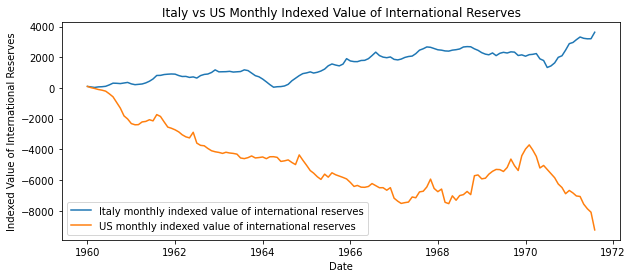

In [13]:
graph = plt.figure()
graph.set_figwidth(10)
graph.set_figheight(4)
plt.plot(df.iloc[:140]['Date'],df.iloc[:140]['International Reserves and Liquidity Index Italy'], label = 'Italy monthly indexed value of international reserves')
plt.plot(df.iloc[:140]['Date'],df.iloc[:140]['International Reserves and Liquidity Index US'], label = 'US monthly indexed value of international reserves')
plt.ylabel('Indexed Value of International Reserves')
plt.xlabel('Date')
plt.title('Italy vs US Monthly Indexed Value of International Reserves')
plt.legend()
plt.show()

## 5.3.2 Inflation and Industrial Production Graphs

Plot a time series graph of monthly inflation, for every month from the start to the end of the
sample. Clearly indicate the time at which that country left the Bretton Woods system.

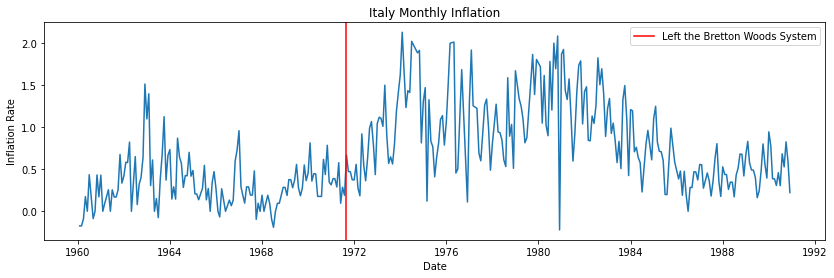

In [14]:
graph = plt.figure()
graph.set_figwidth(14)
graph.set_figheight(4)
plt.plot(df['Date'],df['Monthly Inflation Rate Italy'])
plt.ylabel('Inflation Rate')
plt.xlabel('Date')
plt.title('Italy Monthly Inflation')
plt.axvline(x = datetime.date(1971,9,1), color = 'r', label = 'Left the Bretton Woods System')
plt.legend()
plt.show()

Plot a time series graph of the monthly growth in industrial production, for every month
from the start to the end of the sample. Clearly indicate the time at which that country left the
Bretton Woods system.

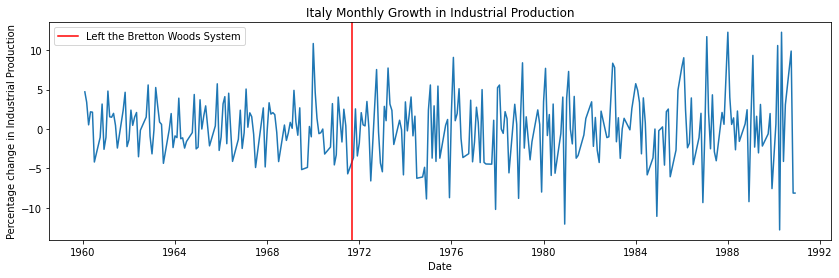

In [15]:
graph = plt.figure()
graph.set_figwidth(14)
graph.set_figheight(4)
plt.plot(df['Date'],df['Monthly Growth in Industrial Production Italy'])
plt.ylabel('Percentage change in Industrial Production')
plt.xlabel('Date')
plt.title('Italy Monthly Growth in Industrial Production')
plt.axvline(x = datetime.date(1971,9,1), color = 'r', label = 'Left the Bretton Woods System')
plt.legend()
plt.show()

Plot a time series graph of the growth in industrial production versus 12 months ago, for
every month from the start to the end of the sample. Clearly indicate the time at which that
country left the Bretton Woods system.

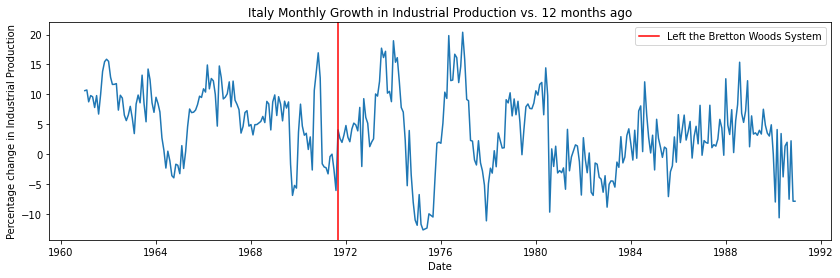

In [16]:
graph = plt.figure()
graph.set_figwidth(14)
graph.set_figheight(4)
plt.plot(df['Date'],df['Growth in industrial production versus 12 months ago Italy'])
plt.ylabel('Percentage change in Industrial Production')
plt.xlabel('Date')
plt.title('Italy Monthly Growth in Industrial Production vs. 12 months ago')
plt.axvline(x = datetime.date(1971,9,1), color = 'r', label = 'Left the Bretton Woods System')
plt.legend()
plt.show()

Why are your results for the monthly versus 12 monthly growth in industrial production so different? Which measure is more useful?

Monthly growth in industrial production compares the level of production in a given month to the level of production in the `previous month`. This measure shows how much production has changed over a `short` period of time and can reflect `seasonal fluctuations`, changes in demand, or disruptions to the supply chain.

On the other hand, growth in industrial production compared to the same month in the `previous year` (also known as year-over-year growth) compares the level of production in a given month to the level of production in the same month of the previous year. This measure shows how much production has changed over a `longer` period of time and can help identify `trends and patterns` in the industry.

The two measures can differ because monthly growth may be affected by `short-term` factors, while year-over-year growth can show the impact of `longer-term` factors, such as changes in the overall economy or industry-specific trends.

Both measures have their uses depending on the context and purpose of the analysis. Monthly growth can be useful for identifying `short-term fluctuations or disruptions`, while year-over-year growth can provide insight into `longer-term trends and patterns`.

## 5.3.3 Comparison Statistics

- Separately for both before and after your country exited Bretton Woods, calculate the standard deviation of:
    - The monthly growth of nominal exchange rates versus the US dollar
    - The monthly growth of real exchange rates versus the US dollar
    - The inflation rate in your country
    - The difference between the inflation in your country versus the United States – The 12-monthly industrial production growth
- When you calculate the standard deviation of variables before Bretton Woods, exclude data for the 10 months immediately before the country left Bretton Woods. Likewise, when you calculate the standard deviation of variables after Bretton Woods, exclude data from the 10 months immediately after the country left.
- Report these numbers in a suitably formatted table, as well as the ratio of the standard deviation of each variable before and after Bretton Woods.
- Why might it be a good idea to exclude data from around the time in which the country departed from Bretton Woods?


In [17]:
# Before Exiting Bretton Woods
# We have already identified the time when Italy exited Bretton Woods is 1971-09-01, so we want to use data until 1970-12-01 (10 months immediately before Italy left Bretton Woods) for the calculation 
before_exit = df.loc[:(pd.Timestamp(1971,9,1) - pd.DateOffset(months=10)), :]
#The monthly growth of nominal exchange rates versus the US dollar
before_exit['Log Exchange Rate Italy'].std()
#The monthly growth of real exchange rates versus the US dollar
before_exit['The difference in the Log Exchange Rate Italy'].std()
#The inflation rate in your country
before_exit['Monthly Inflation Rate Italy'].std()
#The difference between the inflation in your country versus the United States – The 12-monthly industrial production growth
before_exit['Growth in industrial production versus 12 months ago Italy'].std()

# After Exiting Bretton Woods
# We do the same for after Bretton Woods, i.e. after 1972-07-01 ( exclude data from the 10 months immediately after the country left)
after_exit = df.loc[(pd.Timestamp(1971,9,1) + pd.DateOffset(months=10)):, :]
#The monthly growth of nominal exchange rates versus the US dollar
after_exit['Log Exchange Rate Italy'].std()
#The monthly growth of real exchange rates versus the US dollar
after_exit['The difference in the Log Exchange Rate Italy'].std()
#The inflation rate in your country
after_exit['Monthly Inflation Rate Italy'].std()
#The difference between the inflation in your country versus the United States – The 12-monthly industrial production growth
after_exit['Growth in industrial production versus 12 months ago Italy'].std()



# Put in a well-formated table
before_exit_std = [
before_exit['Log Exchange Rate Italy'].std(),
before_exit['The difference in the Log Exchange Rate Italy'].std(),
before_exit['Monthly Inflation Rate Italy'].std(),
before_exit['Growth in industrial production versus 12 months ago Italy'].std()
]

after_exit_std = [
after_exit['Log Exchange Rate Italy'].std(),
after_exit['The difference in the Log Exchange Rate Italy'].std(),
after_exit['Monthly Inflation Rate Italy'].std(),
after_exit['Growth in industrial production versus 12 months ago Italy'].std()
]

# Ratio of sd before and after Bretton Woods
std_ratio = [round(before / after, 2) for before, after in zip(before_exit_std, after_exit_std)]

table = [
['Before Exiting Bretton Woods'] + before_exit_std,
['After Exiting Bretton Woods'] + after_exit_std,
['Ratio of Standard Deviation'] + std_ratio
]
headers = ['', 'Nominal Exchange Rate', 'Real Exchange Rate', 'Inflation Rate', 'Difference in Inflation and Industrial Production Growth']
print(tabulate(table, headers=headers, floatfmt=".4f"))

TypeError: '<' not supported between instances of 'int' and 'Timestamp'

- Why might it be a good idea to exclude data from around the time in which the country departed from Bretton Woods?\
It can help mitigate the impact of any sudden changes or disruptions in the data caused by the exit of Bretton Woods. By removing these potentially anomalous data points, the resulting standard deviation can provide a more accurate representation of the underlying variation in the data before and after the exit.